In [6]:
import os
import cv2
from rembg import remove 
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import random


In [12]:
path_dataset= 'anhhoa'
pd.DataFrame(os.listdir(path_dataset), columns = ['file_name'])

,file_name
0,hoacuctrang01.jpg
1,hoacuctrang02.jpg
2,hoacuctrang03.jpg
3,hoacuctrang04.jpg
4,hoacuctrang05.jpg
...,...
153,hoathachthao5.jpg
154,hoathachthao6.jpg
155,hoathachthao7.jpg
156,hoathachthao8.jpg


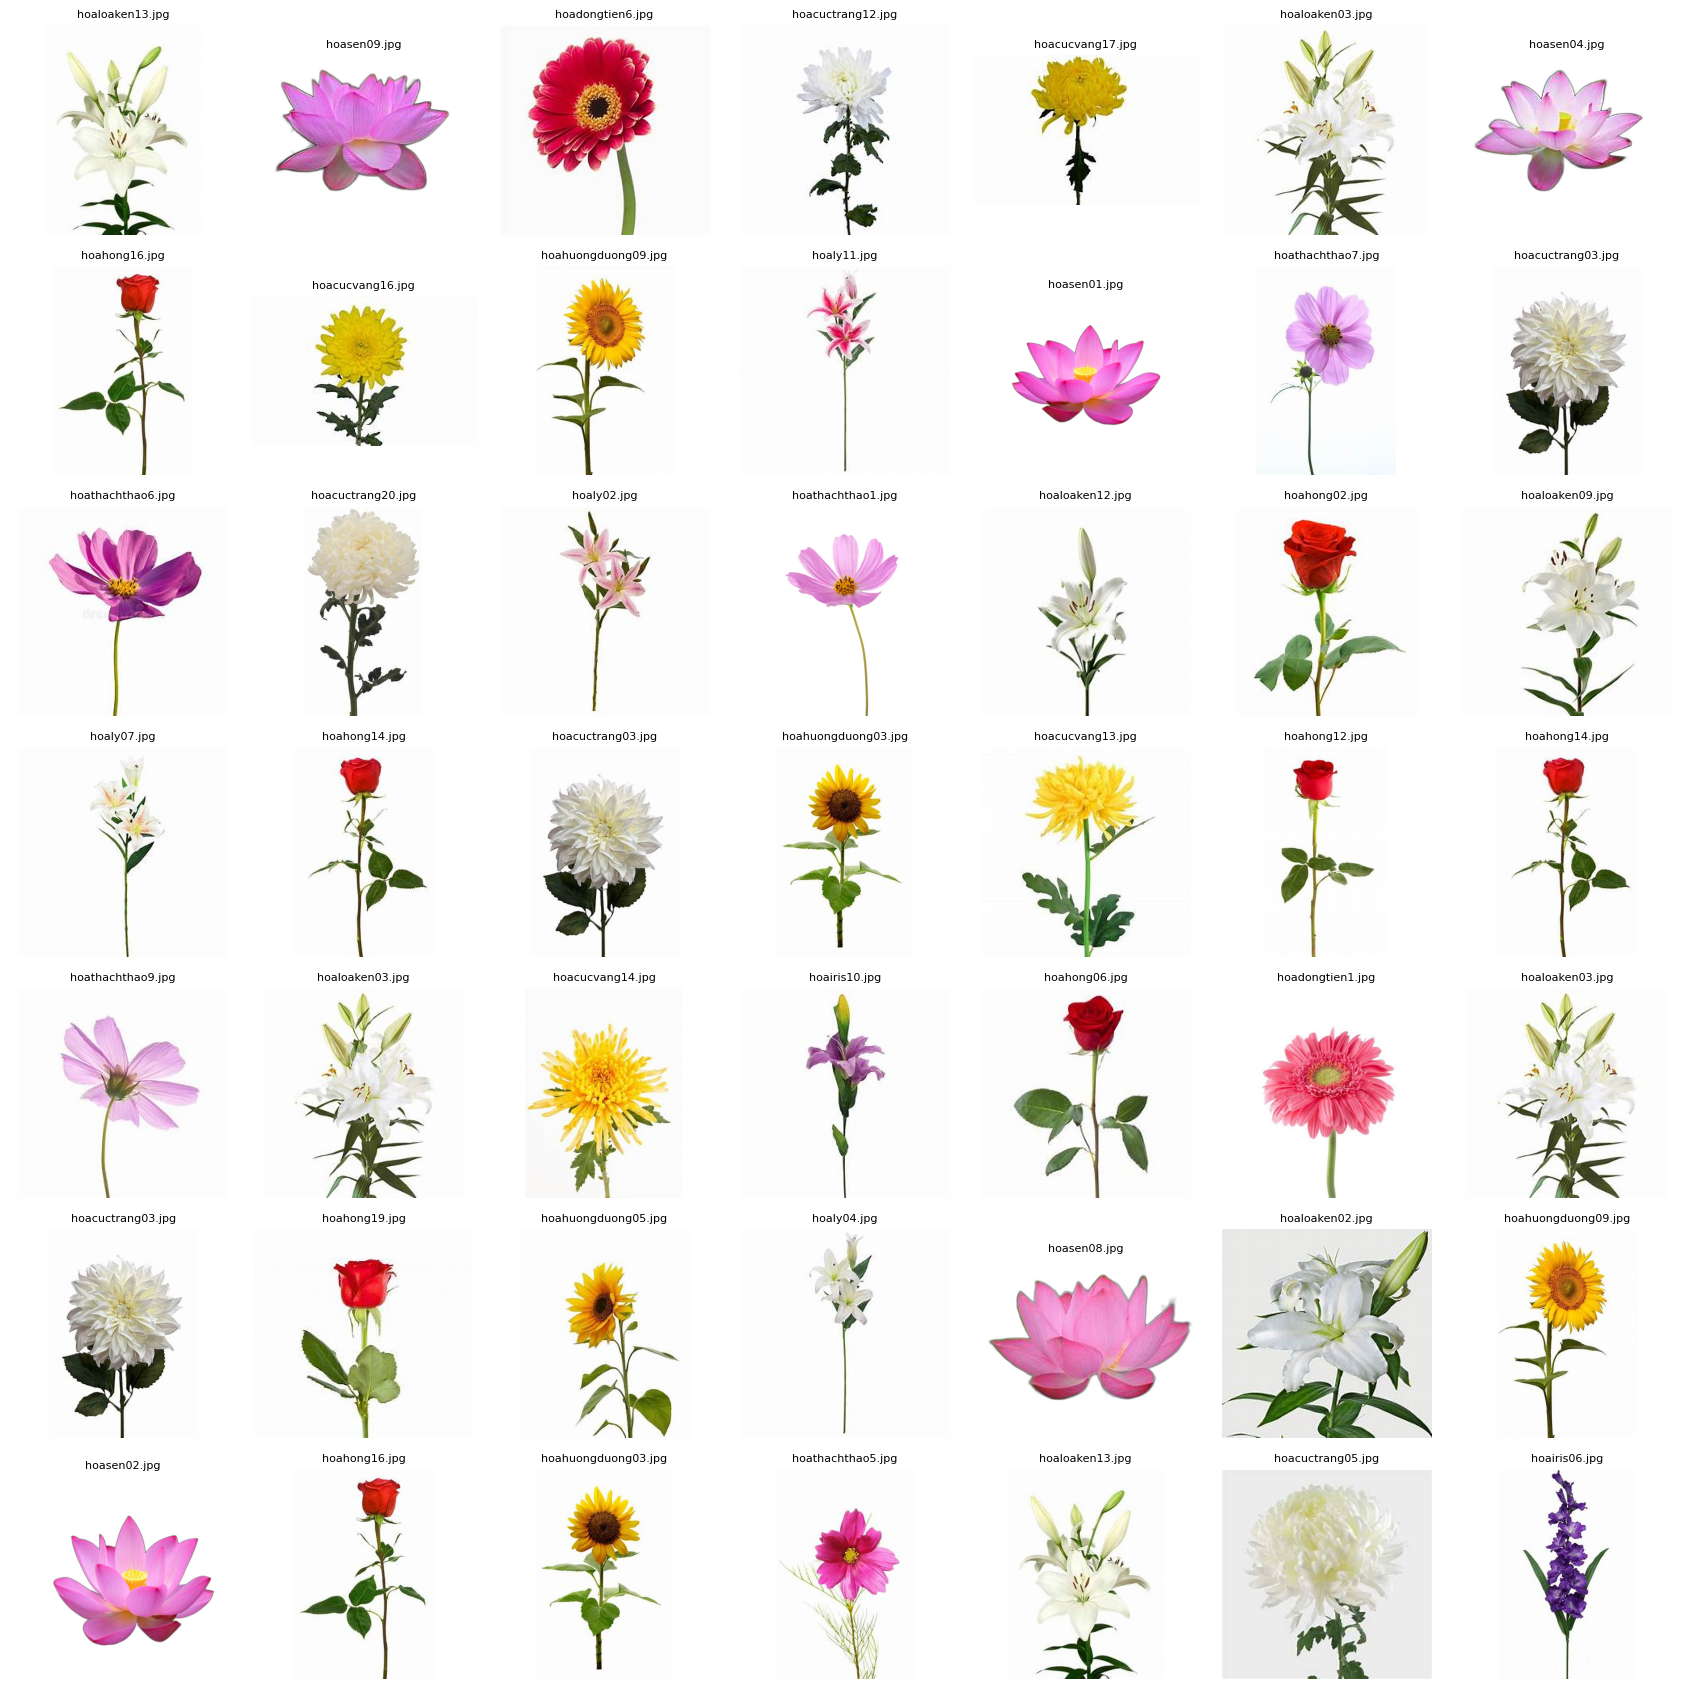

In [16]:
df = pd.DataFrame(os.listdir(path_dataset), columns = ['file_name'])

W = 7
H = 7
fig, axes = plt.subplots(W, H, figsize=(17, 17))

# Lặp qua từng ô của lưới hình ảnh
for i in range(W):
    for j in range(H):
        # Chọn ngẫu nhiên một tệp ảnh từ danh sách
        random_image = random.choice(df['file_name'])
        img_path = os.path.join(path_dataset, random_image)
        # Đọc hình ảnh từ đường dẫn đầy đủ của hình ảnh đã chọn
        img = Image.open(img_path)
        # Hiển thị hình ảnh lên ô hình ảnh thứ (i, j) trong lưới
        axes[i, j].imshow(img)
        # Đặt tiêu đề cho hình ảnh là tên tệp ảnh, với cỡ chữ là 8
        axes[i, j].set_title(random_image, fontsize=8)
        # Tắt trục đồ thị để loại bỏ các dấu nhắc nhở trục trong hình ảnh
        axes[i, j].axis('off')
  
# Hiển thị lưới hình ảnh
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from rembg import remove  # Cần cài đặt thư viện rembg

def remove_background(input_folder, output_folder):
    # Đảm bảo thư mục output tồn tại
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Lặp qua các tệp trong thư mục input
    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)

        # Đảm bảo chỉ xử lý các tệp ảnh
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Đọc ảnh từ tệp
            image = Image.open(input_path)

            try:
                # Xóa nền của ảnh
                img_bg_removed = remove(image)
                
                # Tạo ảnh nền trắng
                background = Image.new('RGB', img_bg_removed.size, (255, 255, 255))
                
                # Chồng ảnh đã xóa nền lên nền trắng
                img_bg_removed = Image.alpha_composite(background.convert('RGBA'), img_bg_removed)

                # Chuyển đổi ảnh sang mode 'RGB' trước khi lưu
                img_bg_removed = img_bg_removed.convert("RGB")
                img_bg_removed.save(output_path, format='png')  # Lưu dưới định dạng PNG

                print(f"Đã xử lý và lưu ảnh {file_name}")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

# Thư mục chứa ảnh gốc
input_folder = "anhhoa"
# Thư mục lưu ảnh đã xử lý
output_folder = f"{input_folder}_nobg"

# Thực hiện xoá nền và lưu vào thư mục mới
remove_background(input_folder, output_folder)


In [ ]:
def resize_images(folder_path, output_folder, target_size=(350, 350)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Lặp qua tất cả các tệp trong thư mục
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        output_path = os.path.join(output_folder, file_name)
        # Đảm bảo chỉ xử lý các tệp ảnh
        if file_name.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            # Đọc ảnh từ tệp
            image = cv2.imread(file_path)
            up_width = 224
            up_height = 224
            up_points = (up_width, up_height)
            resized_up = cv2.resize(image, up_points, interpolation=cv2.INTER_LINEAR)
            cv2.imwrite(output_path, resized_up)
            print(f"Đã resize và lưu ảnh {file_name}")

# Thư mục chứa ảnh gốc
folder_path = "anhhoa"
output_folder = f"{folder_path}_resize"
resize_images(folder_path, output_folder)

In [13]:
import os

def rename_images(folder_path):
    # Loại bỏ khoảng trắng và dấu gạch dưới
    folder_name = folder_path.lower().replace(" ", "").replace("_", "").replace("đ", "d").replace("ồ", "o").replace("ề", "e")
    # Loại bỏ dấu
    # Đảm bảo đường dẫn thư mục tồn tại
    if not os.path.exists(folder_path):
        print(f"Thư mục '{folder_path}' không tồn tại.")
        return

    # Lặp qua tất cả các tệp trong thư mục
    file_list = os.listdir(folder_path)
    i = 1
    for file_name in file_list:
        # Chỉ xử lý các tệp có định dạng hình ảnh
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.webp')):
            # Tạo tên mới cho tệp
            new_name = f"{i}.jpg"
            new_path = os.path.join(folder_path, new_name)
            
            # Đảm bảo không ghi đè tên tệp đã tồn tại
            if os.path.exists(new_path):
                print(f"Tệp '{new_name}' đã tồn tại, đang ghi đè.")
                os.remove(new_path)
                
            # Đổi tên tệp
            os.rename(os.path.join(folder_path, file_name), new_path)
            i += 1

    print("Đã đổi tên tất cả các tệp ảnh trong thư mục.")

# Thay đường dẫn dưới đây bằng đường dẫn đến thư mục chứa ảnh của bạn
folder_path = "anhhoa_resize"
rename_images(folder_path)


Đã đổi tên tất cả các tệp ảnh trong thư mục.


In [12]:
import os
import csv
from PIL import Image

def rename_images(input_folder, output_folder, csv_filename):
    # Đảm bảo thư mục output tồn tại
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Tạo tệp CSV và ghi tiêu đề
    with open(csv_filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['New Filename'])

        # Lặp qua các tệp trong thư mục input
        for idx, file_name in enumerate(os.listdir(input_folder)):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                original_path = os.path.join(input_folder, file_name)
                new_filename = f"{idx + 1}.jpg"
                new_path = os.path.join(output_folder, new_filename)

                try:
                    # Đọc và lưu ảnh với tên mới
                    image = Image.open(original_path)
                    image.save(new_path)

                    # Ghi thông tin vào tệp CSV
                    csvwriter.writerow([file_name, new_filename])

                    print(f"Renamed {file_name} to {new_filename}")
                except Exception as e:
                    print(f"Error processing file {file_name}: {e}")

# Thư mục chứa ảnh gốc
input_folder = "anhhoa"
# Thư mục lưu ảnh đã đổi tên
output_folder = "anhhoa_renamed"
# Tệp CSV lưu thông tin tên ảnh
csv_filename = "renamed_images.csv"

# Thực hiện đổi tên ảnh và lưu thông tin vào tệp CSV
rename_images(input_folder, output_folder, csv_filename)


Renamed hoacuctrang01.jpg to 1.jpg
Renamed hoacuctrang02.jpg to 2.jpg
Renamed hoacuctrang03.jpg to 3.jpg
Renamed hoacuctrang04.jpg to 4.jpg
Renamed hoacuctrang05.jpg to 5.jpg
Renamed hoacuctrang06.jpg to 6.jpg
Renamed hoacuctrang07.jpg to 7.jpg
Renamed hoacuctrang08.jpg to 8.jpg
Renamed hoacuctrang09.jpg to 9.jpg
Renamed hoacuctrang10.jpg to 10.jpg
Renamed hoacuctrang11.jpg to 11.jpg
Renamed hoacuctrang12.jpg to 12.jpg
Renamed hoacuctrang13.jpg to 13.jpg
Renamed hoacuctrang14.jpg to 14.jpg
Renamed hoacuctrang15.jpg to 15.jpg
Renamed hoacuctrang16.jpg to 16.jpg
Renamed hoacuctrang17.jpg to 17.jpg
Renamed hoacuctrang18.jpg to 18.jpg
Renamed hoacuctrang19.jpg to 19.jpg
Renamed hoacuctrang20.jpg to 20.jpg
Renamed hoacucvang01.jpg to 21.jpg
Renamed hoacucvang02.jpg to 22.jpg
Renamed hoacucvang03.jpg to 23.jpg
Renamed hoacucvang04.jpg to 24.jpg
Renamed hoacucvang05.jpg to 25.jpg
Renamed hoacucvang06.jpg to 26.jpg
Renamed hoacucvang07.jpg to 27.jpg
Renamed hoacucvang08.jpg to 28.jpg
Renamed h